# NHK COVID-19 Dataset
by Ou Deng, OCT 8, 2021

Data sorce link: https://www3.nhk.or.jp/n-data/opendata/coronavirus/nhk_news_covid19_prefectures_daily_data.csv

Q: How it works?

A: It gets NHK COVID-19 dataset automatically and saves as working csv, then plots them.

Q: How to use this file?

A: Input to choose which column of data.
   And input to choose the prefecture(s) to plot.

Data column names: 日付/都道府県コード/都道府県名/各地の感染者数_1日ごとの発表数/各地の感染者数_累計/各地の死者数_1日ごとの発表数/各地の死者数_累計

Data column names_EN: Date/Prefecture_ID/Name/Daily_Confirmed_Cases/Daily_Confirmed_Cases_Total/Daily_Death/Death_Total

#### Useful reference:

Matplotlib gallery: https://matplotlib.org/stable/gallery/index.html

Date Index Formatter: https://matplotlib.org/stable/gallery/ticks_and_spines/date_index_formatter2.html#sphx-glr-gallery-ticks-and-spines-date-index-formatter2-py

Monthly data sampel: https://qiita.com/damyarou/items/afbff7a909f2c1508fab

In [1]:
import numpy as np
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

import io
import requests

# NHK COVID-19 Dataset.
url="https://www3.nhk.or.jp/n-data/opendata/coronavirus/nhk_news_covid19_prefectures_daily_data.csv"
s=requests.get(url).content
data_all=pd.read_csv(io.StringIO(s.decode('utf-8')))

df0 = data_all.rename(columns = {'日付': 'Date', 
                                 '都道府県コード': 'Prefecture_ID', 
                                 '都道府県名':'Name',
                                 '各地の感染者数_1日ごとの発表数':'Daily_Confirmed_Cases',
                                 '各地の感染者数_累計':'Daily_Confirmed_Cases_Total',
                                 '各地の死者数_1日ごとの発表数':'Daily_Death',
                                 '各地の死者数_累計':'Death_Total',
                                 '各地の直近1週間の人口10万人あたりの感染者数':'Death_Ratio_of_Population(100k)'}, inplace = False)


In [2]:
df0

,Date,Prefecture_ID,Name,Daily_Confirmed_Cases,Daily_Confirmed_Cases_Total,Daily_Death,Death_Total,Death_Ratio_of_Population(100k)
0,2020/1/16,1,北海道,0,0,0,0,NaN
1,2020/1/17,1,北海道,0,0,0,0,NaN
2,2020/1/18,1,北海道,0,0,0,0,NaN
3,2020/1/19,1,北海道,0,0,0,0,NaN
4,2020/1/20,1,北海道,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...
29699,2021/10/4,47,沖縄県,9,49737,6,323,21.47
29700,2021/10/5,47,沖縄県,38,49775,4,327,20.17
29701,2021/10/6,47,沖縄県,30,49805,0,327,17.48
29702,2021/10/7,47,沖縄県,16,49821,5,332,14.18


In [3]:
# Set data-filter.

# INPUTS START.
Chosen_Col = '6'  # in Col_Dict
Chosen_Prefecture_ID = [13, 14, 47]  # in Prefecture_Dict
# INPUTS END.

# Inputs sources.

# Make columm names as dict data-type. Set ONE of them to analyze.
Col_Dict = {'0':'Prefecture_ID', '1':'Name', '2':'Daily_Confirmed_Cases', '3':'Daily_Confirmed_Cases_Total',
            '4':'Daily_Death', '5':'Death_Total', '6':'Death_Ratio_of_Population(100k)'}

# Prefecture_Dict
Prefecture_Dict = {'1': 'Hokkaido','2': 'Aomori','3': 'Iwate','4': 'Miyagi','5': 'Akita','6': 'Yamagata','7': 'Fukushima',
                   '8': 'Ibaraki','9': 'Tochigi','10': 'Gunma','11': 'Saitama','12': 'Chiba','13': 'Tokyo','14': 'Kanagawa',
                   '15': 'Niggata','16': 'Toyama','17': 'Ishikawa','18': 'Fukui','19': 'Yamanashi','20': 'Nagano',
                   '21': 'Gifu','22': 'Shizuoka','23': 'Aichi','24': 'Mie','25': 'Shiga','26': 'Kyoto','27': 'Osaka',
                   '28': 'Hyogo','29': 'Nara','30': 'Wakayama','31': 'Totori','32': 'Shimane','33': 'Okayama','34': 'Hiroshima',
                   '35': 'Yamaguchi','36':'Tokushima','37': 'Kagawa','38': 'Ehime','39': 'Kochi','40': 'Fukuoka',
                   '41': 'Saga','42': 'Nagasaki','43': 'Kumamoto','44': 'Oita','45': 'Miyazaki','46': 'Kagoshima','47': 'Okinawa'}


print(Col_Dict[Chosen_Col])
for i in Chosen_Prefecture_ID:
    print(Prefecture_Dict[str(i)])

Death_Ratio_of_Population(100k)
Tokyo
Kanagawa
Okinawa


In [4]:
# Filter data to plot and save.
# Pandas 查询筛选数据:  https://www.gairuo.com/p/pandas-selecting-data

# Pandas filter 筛选标签: https://www.gairuo.com/p/pandas-filter
# Ref: https://qiita.com/FukuharaYohei/items/5b739a5ceb43d25aa2cd

# ref: https://www.cxyzjd.com/article/yeziand01/94412056
df00 = df0.loc[df0['Prefecture_ID'].isin(Chosen_Prefecture_ID),['Date','Prefecture_ID',Col_Dict[Chosen_Col]]]

print(df00)


            Date  Prefecture_ID  Death_Ratio_of_Population(100k)
7584   2020/1/16             13                              NaN
7585   2020/1/17             13                              NaN
7586   2020/1/18             13                              NaN
7587   2020/1/19             13                              NaN
7588   2020/1/20             13                              NaN
...          ...            ...                              ...
29699  2021/10/4             47                            21.47
29700  2021/10/5             47                            20.17
29701  2021/10/6             47                            17.48
29702  2021/10/7             47                            14.18
29703  2021/10/8             47                            13.35

[1896 rows x 3 columns]


In [5]:
df01 = pd.DataFrame(index=[], columns=[]) 
df_tmp = pd.DataFrame(index=[], columns=[]) 
for i in Chosen_Prefecture_ID:
    df_tmp = df00.loc[df0['Prefecture_ID'] == i,['Date',Col_Dict[Chosen_Col]]].set_index("Date")
    df_tmp.rename(columns={Col_Dict[Chosen_Col]:Prefecture_Dict[str(i)]},inplace=True)  # https://www.codeleading.com/article/29833144139/
    df01 = pd.concat([df01, df_tmp], axis=1)
    print(df01)

           Tokyo
Date            
2020/1/16    NaN
2020/1/17    NaN
2020/1/18    NaN
2020/1/19    NaN
2020/1/20    NaN
...          ...
2021/10/4   9.89
2021/10/5   9.14
2021/10/6   8.30
2021/10/7   7.76
2021/10/8   7.31

[632 rows x 1 columns]
           Tokyo  Kanagawa
Date                      
2020/1/16    NaN       NaN
2020/1/17    NaN       NaN
2020/1/18    NaN       NaN
2020/1/19    NaN       NaN
2020/1/20    NaN       NaN
...          ...       ...
2021/10/4   9.89      7.84
2021/10/5   9.14      7.28
2021/10/6   8.30      6.81
2021/10/7   7.76      6.51
2021/10/8   7.31      5.97

[632 rows x 2 columns]
           Tokyo  Kanagawa  Okinawa
Date                               
2020/1/16    NaN       NaN      NaN
2020/1/17    NaN       NaN      NaN
2020/1/18    NaN       NaN      NaN
2020/1/19    NaN       NaN      NaN
2020/1/20    NaN       NaN      NaN
...          ...       ...      ...
2021/10/4   9.89      7.84    21.47
2021/10/5   9.14      7.28    20.17
2021/10/6   8.30    

In [6]:
df01

,Tokyo,Kanagawa,Okinawa
Date,,,
2020/1/16,NaN,NaN,NaN
2020/1/17,NaN,NaN,NaN
2020/1/18,NaN,NaN,NaN
2020/1/19,NaN,NaN,NaN
2020/1/20,NaN,NaN,NaN
...,...,...,...
2021/10/4,9.89,7.84,21.47
2021/10/5,9.14,7.28,20.17
2021/10/6,8.30,6.81,17.48


In [7]:
# Save the filtering result as CSV to the spcific folder. Notice: must make directory at first.
result_path = './Filtering_Result/'
csv_file = result_path + 'Result_' + Col_Dict[Chosen_Col] +'.csv'
df01.to_csv(csv_file, index=True, encoding='cp932')

In [8]:
# The saved csv file confirmed.  Oct 8, 2021 

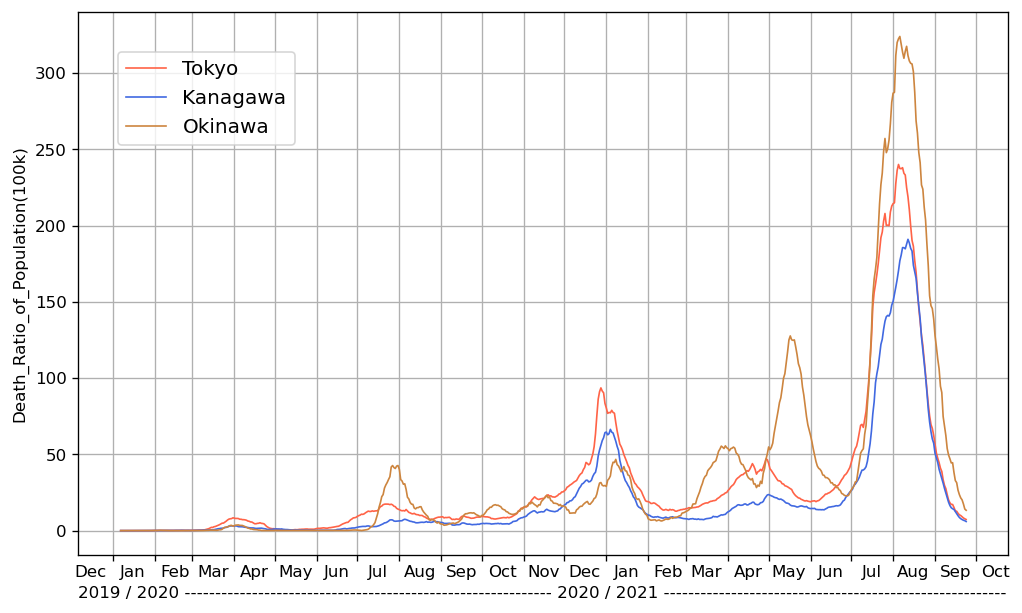

In [9]:
# Plot graph. Need make it be better.

fig, ax = plt.subplots(1,1,figsize=(10,6), dpi=120)
plt.grid(axis='both') #axis='y'

L1 = df01[Prefecture_Dict[str(Chosen_Prefecture_ID[0])]].tolist()
L2 = df01[Prefecture_Dict[str(Chosen_Prefecture_ID[1])]].tolist()
L3 = df01[Prefecture_Dict[str(Chosen_Prefecture_ID[2])]].tolist()

ax.set_ylabel(Col_Dict[Chosen_Col], color='black')
ax.plot(L1, color='tomato', linewidth=1.0, linestyle='-', label=Prefecture_Dict[str(Chosen_Prefecture_ID[0])])
ax.plot(L2, color='royalblue', linewidth=1.0, linestyle='-', label=Prefecture_Dict[str(Chosen_Prefecture_ID[1])])
ax.plot(L3, color='peru', linewidth=1.0, linestyle='-', label=Prefecture_Dict[str(Chosen_Prefecture_ID[2])])

ax.legend(loc='upper left', borderaxespad=2, fontsize=12)

ax.xaxis.set_major_locator(mdates.MonthLocator())
# 16 is a slight approximation since months differ in number of days.
ax.xaxis.set_minor_locator(mdates.MonthLocator(bymonthday=16))

ax.xaxis.set_major_formatter(ticker.NullFormatter())
ax.xaxis.set_minor_formatter(mdates.DateFormatter('%b'))

ax.set_ylabel(Col_Dict[Chosen_Col], color='black')

for tick in ax.xaxis.get_minor_ticks():
    tick.tick1line.set_markersize(0)
    tick.tick2line.set_markersize(0)
    tick.label1.set_horizontalalignment('center')

ax.set_xlabel('2019 / 2020 ------------------------------------------------------------ 2020 / 2021 --------------------------------------------------------', loc='left')

# Save result png.
png_file =  Col_Dict[Chosen_Col] + '.png'
fig.savefig(result_path + png_file)


plt.show()

In [10]:
# Graph all Japan data. Later do it if necessary.

